In [1]:
!pip install boto3 sagemaker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 49.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 416.0/416.0 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.3/82.3 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import sklearn
from sklearn.model_selection import train_test_split
from matplotlib import rcParams
sns.set_style('whitegrid')
sns.set_context('poster')

import boto3
import sagemaker
from sagemaker import get_execution_role

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml


# 1.Collection of Data

Loading dataset from Sklearn

In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing() #loading the dataset to the variable named housing
# Convert to a DataFrame for easier viewing
df = pd.DataFrame(housing.data, columns=housing.feature_names)

# Show column names
print("Columns:", df.columns.tolist())

# Show row indices
print("Row indices:", df.index)

# Optional: Add the target (house value) to the DataFrame
df['target'] = housing.target

Columns: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Row indices: RangeIndex(start=0, stop=20640, step=1)


In [3]:
housing.data.shape #To check the number of rows and columns present

(20640, 8)

# Describing the Dataset

In [4]:
print(housing.DESCR)#Shows the features and its description

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [5]:
#Determines the Column names
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


# Converting our data frames by applying Panda Library functions

In [6]:
#Converting Califonia data into pandas dataframe using pd.Dataframe()
housing_df = pd.DataFrame(housing.data)
housing_df.head()

0     1         2         3       4         5      6       7
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25

In [7]:
#Replacing column heading integers with respective feature names.
housing_df.columns = housing.feature_names
housing_df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25

In [8]:
#Adding Price as another feature in the dataset
housing_df['Price'] = housing.target
housing_df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422

In [9]:
housing_df.shape

(20640, 9)

# Exploratory Data Analysis

Dataset statistics

In [10]:
#Summary of each column using describe()
housing_df.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude         Price  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.540000   -124.350000      0.149990  
25%        2.429741     33.930000   -121.800000      1.196000  
50%        2.818116     34.260000   -118.490000      1.797000  
75%        3.282261     37.710000   -118.010000      2.647250  
max     1243.333333     41.950000   -114.310000      5.000010

In [11]:
#Finding out the co-relations between the features
corr = housing_df.corr()
corr.shape

(9, 9)

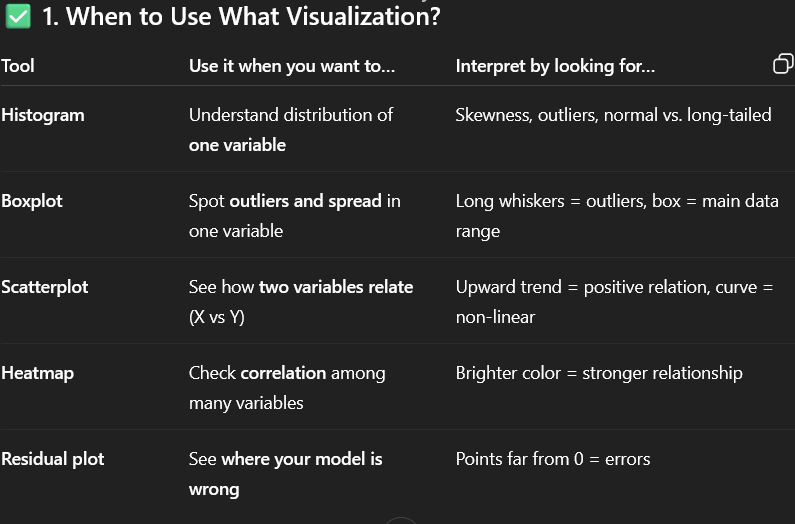

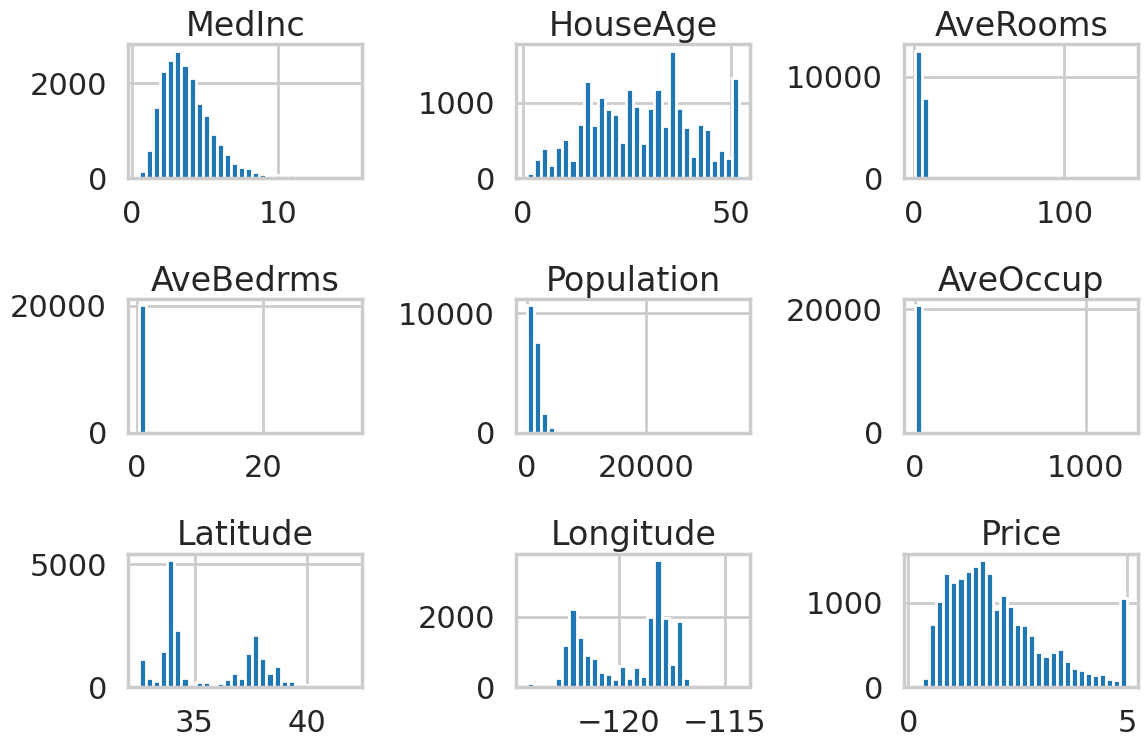

In [12]:
housing_df.hist(bins=30, figsize=(12, 8))
plt.tight_layout()
plt.show()

<Axes: xlabel='Price'>

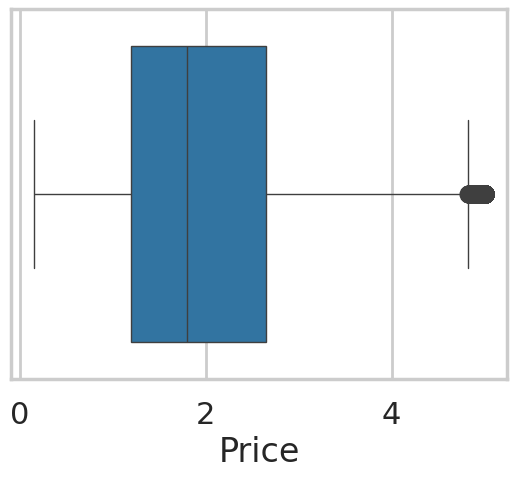

In [13]:
sns.boxplot(data=housing_df, x='Price')

Features Heatmap

<Axes: xlabel='MedInc', ylabel='Price'>

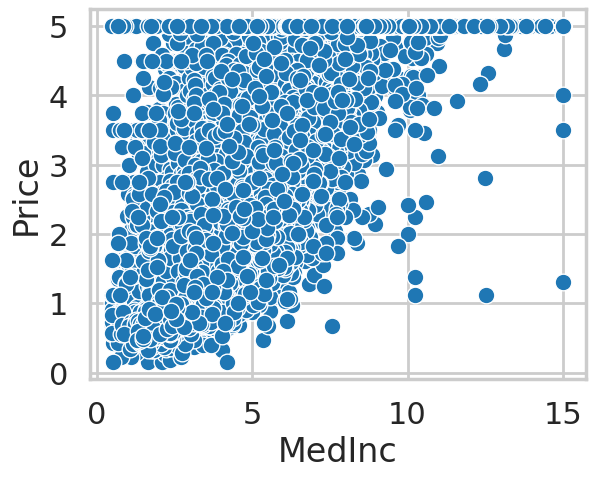

In [14]:
sns.scatterplot(x='MedInc', y='Price', data=housing_df)

That horizontal line of dots at MedHouseVal = 5.0 is not a natural pattern — it’s capping (also called truncation or right-censoring).

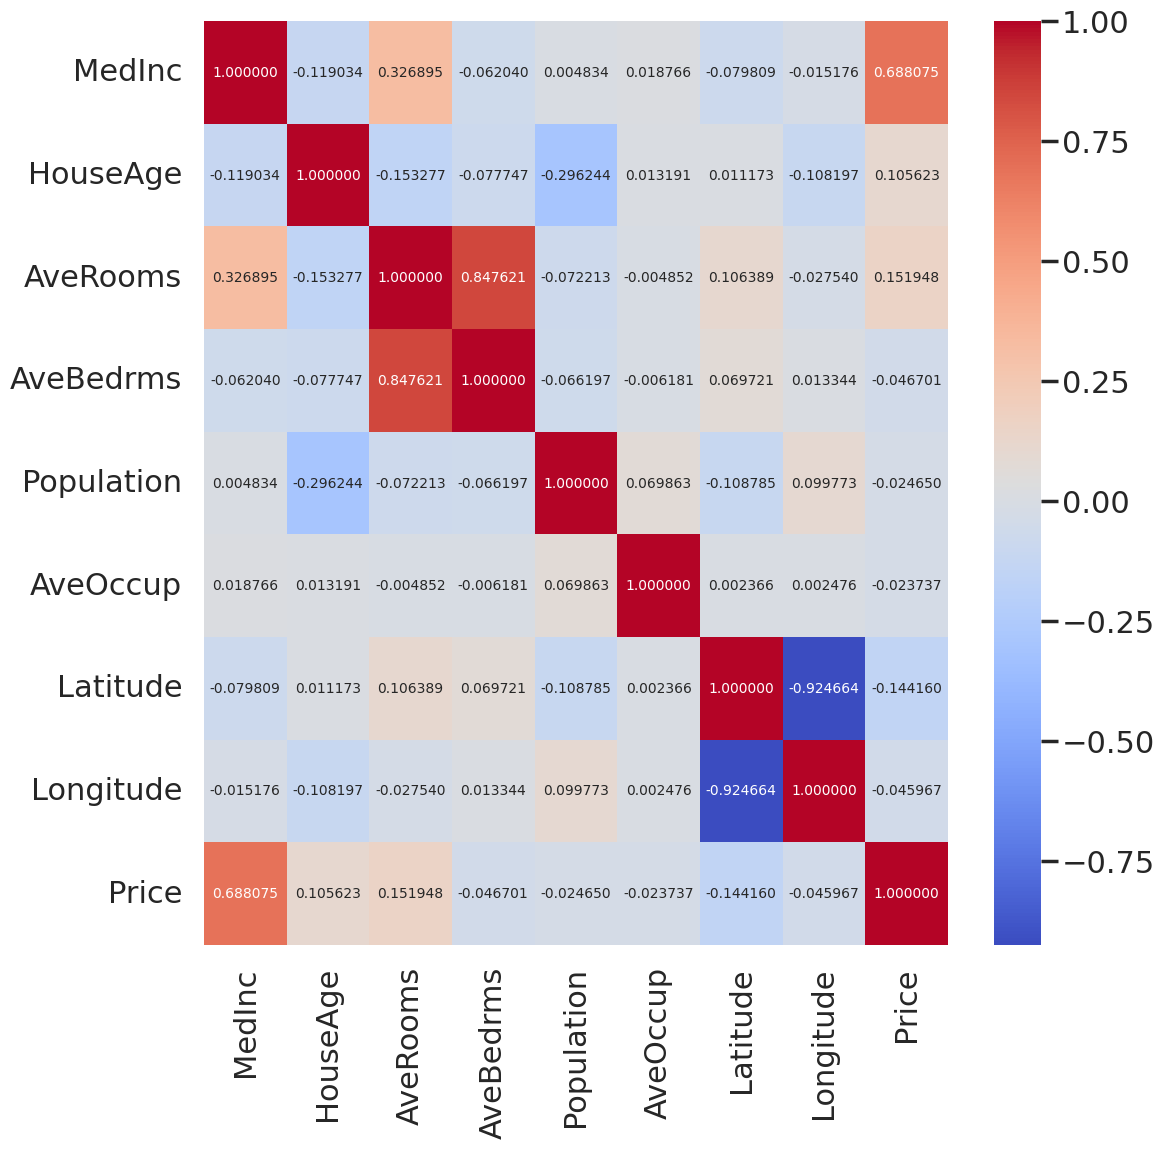

In [15]:
#Plotting the heatmap of co-relation between features
plt.figure(figsize=(12,12))
sns.heatmap(corr, cbar = True, fmt='1f', annot= True, annot_kws = {'size':10}, cmap = 'coolwarm');

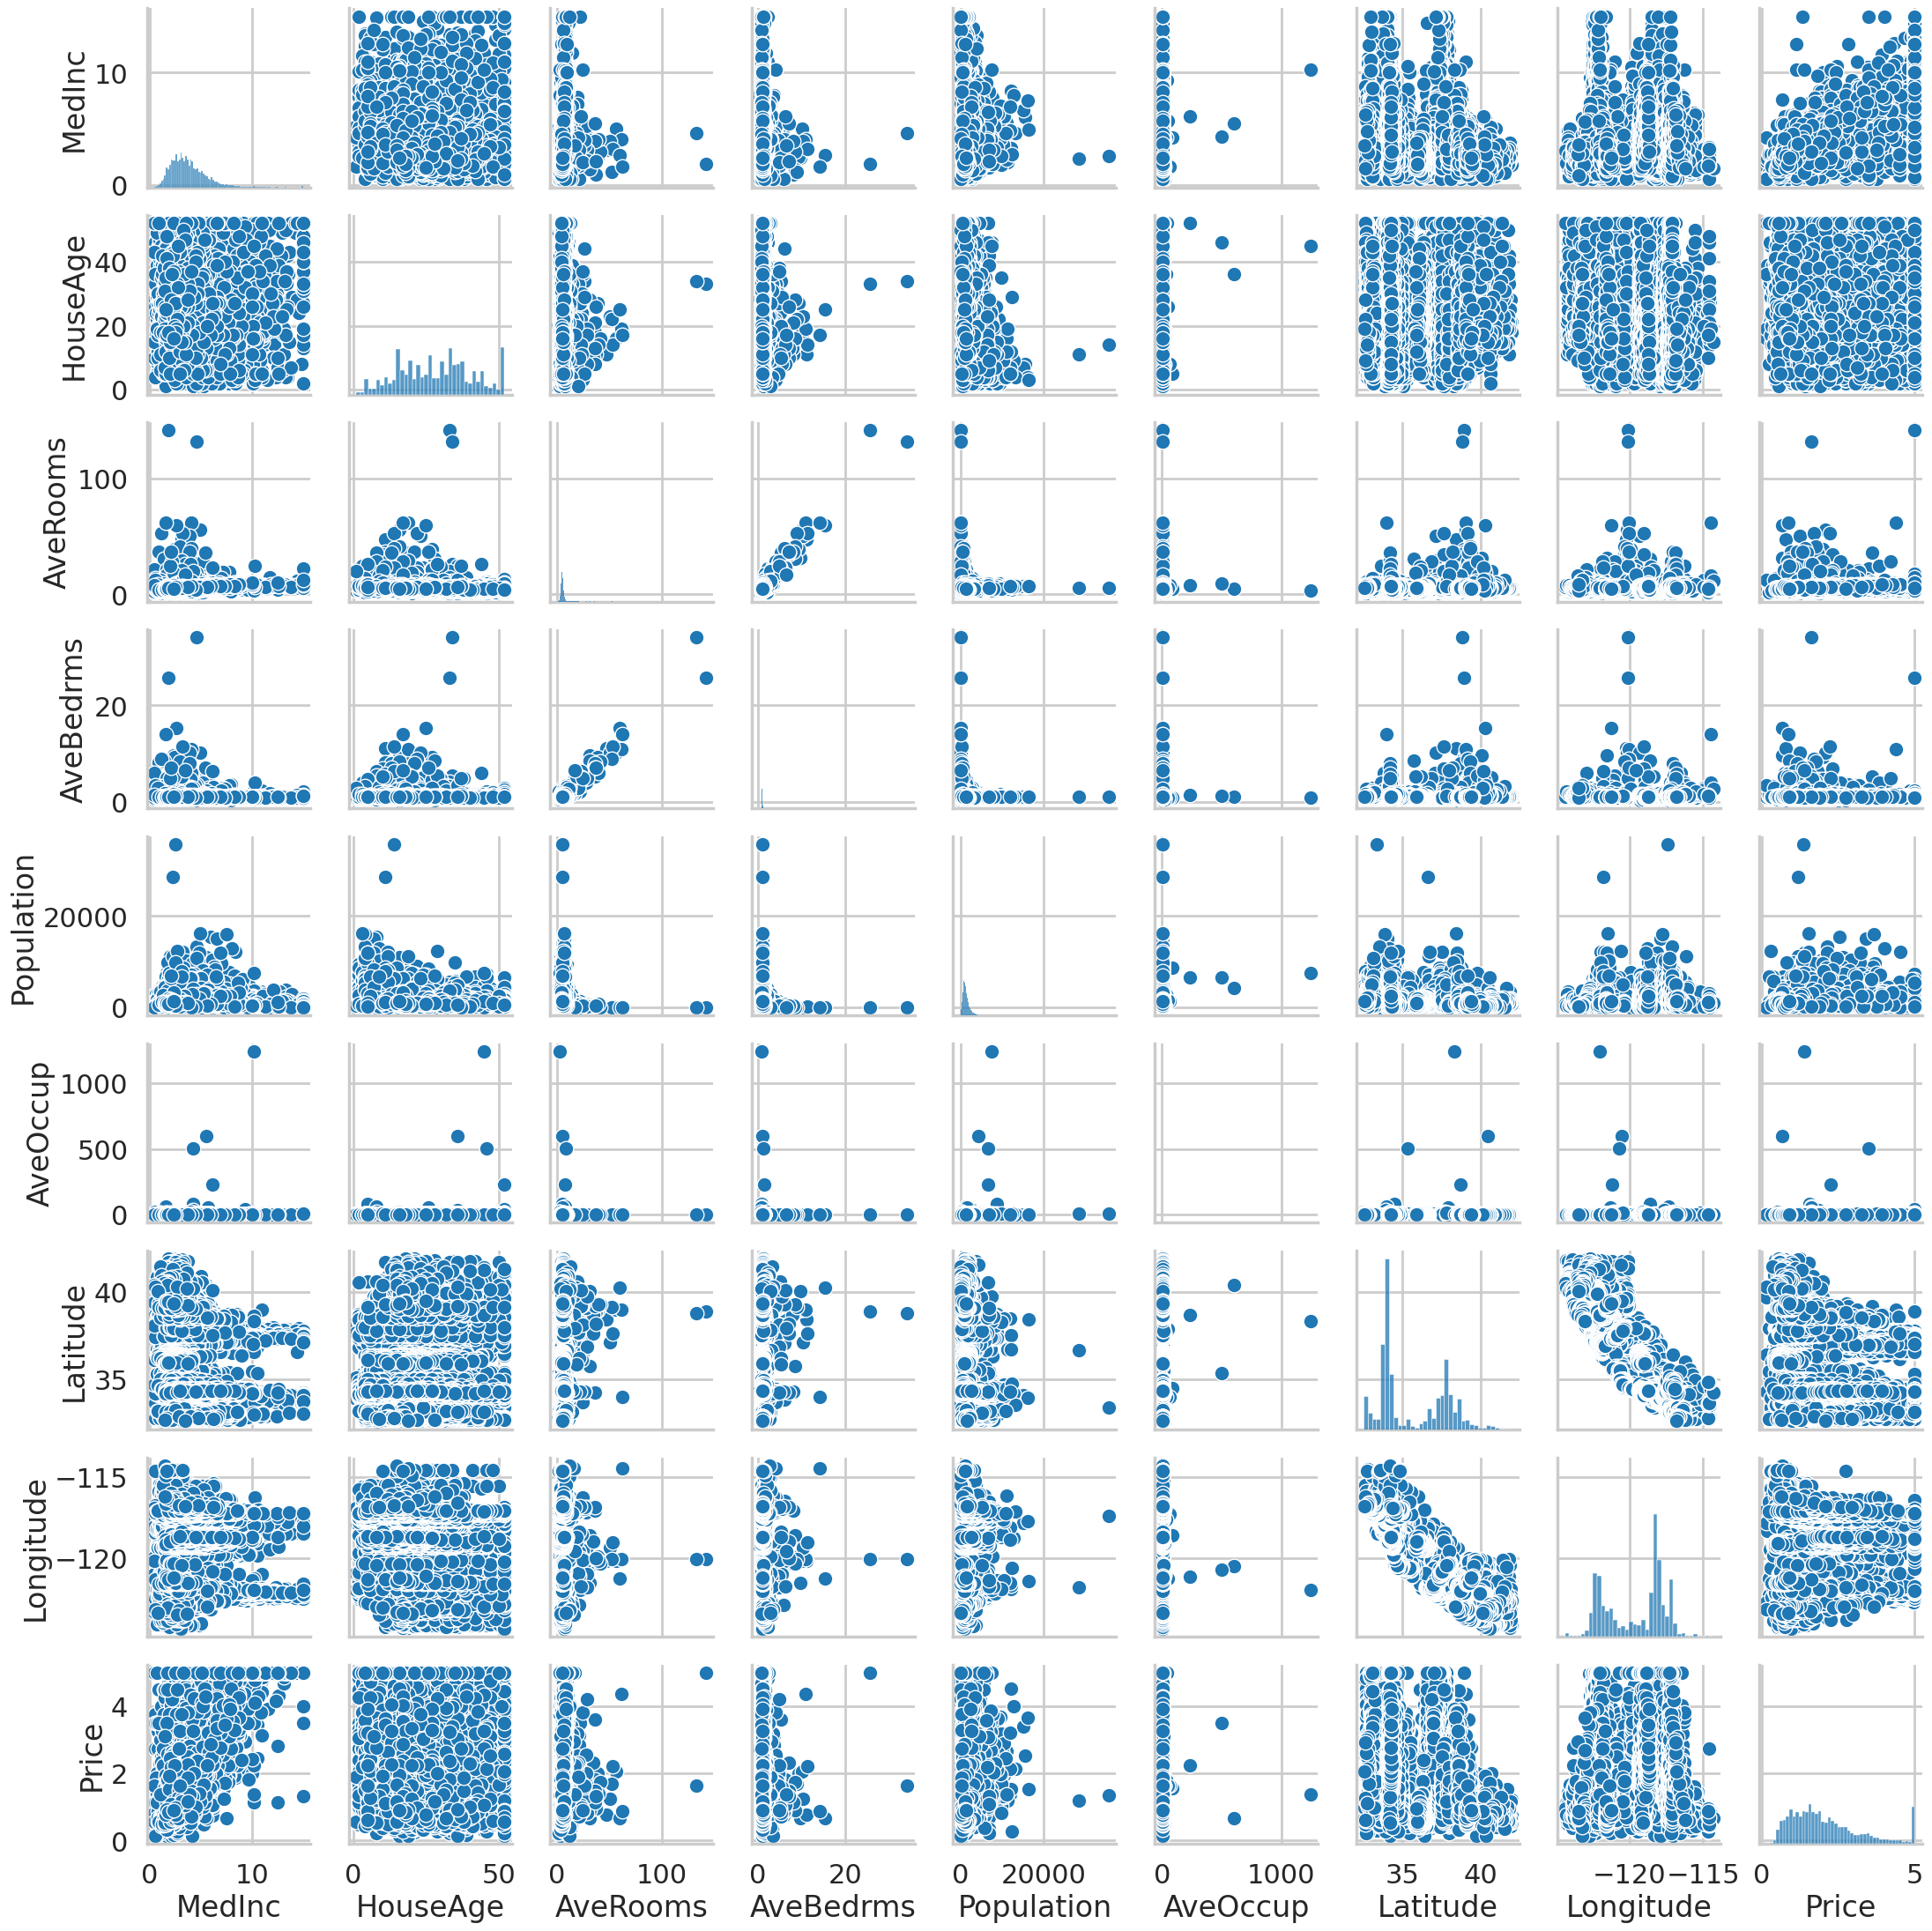

In [16]:
  #Visual Look at the same heatmap
  sns.pairplot(data=housing_df)

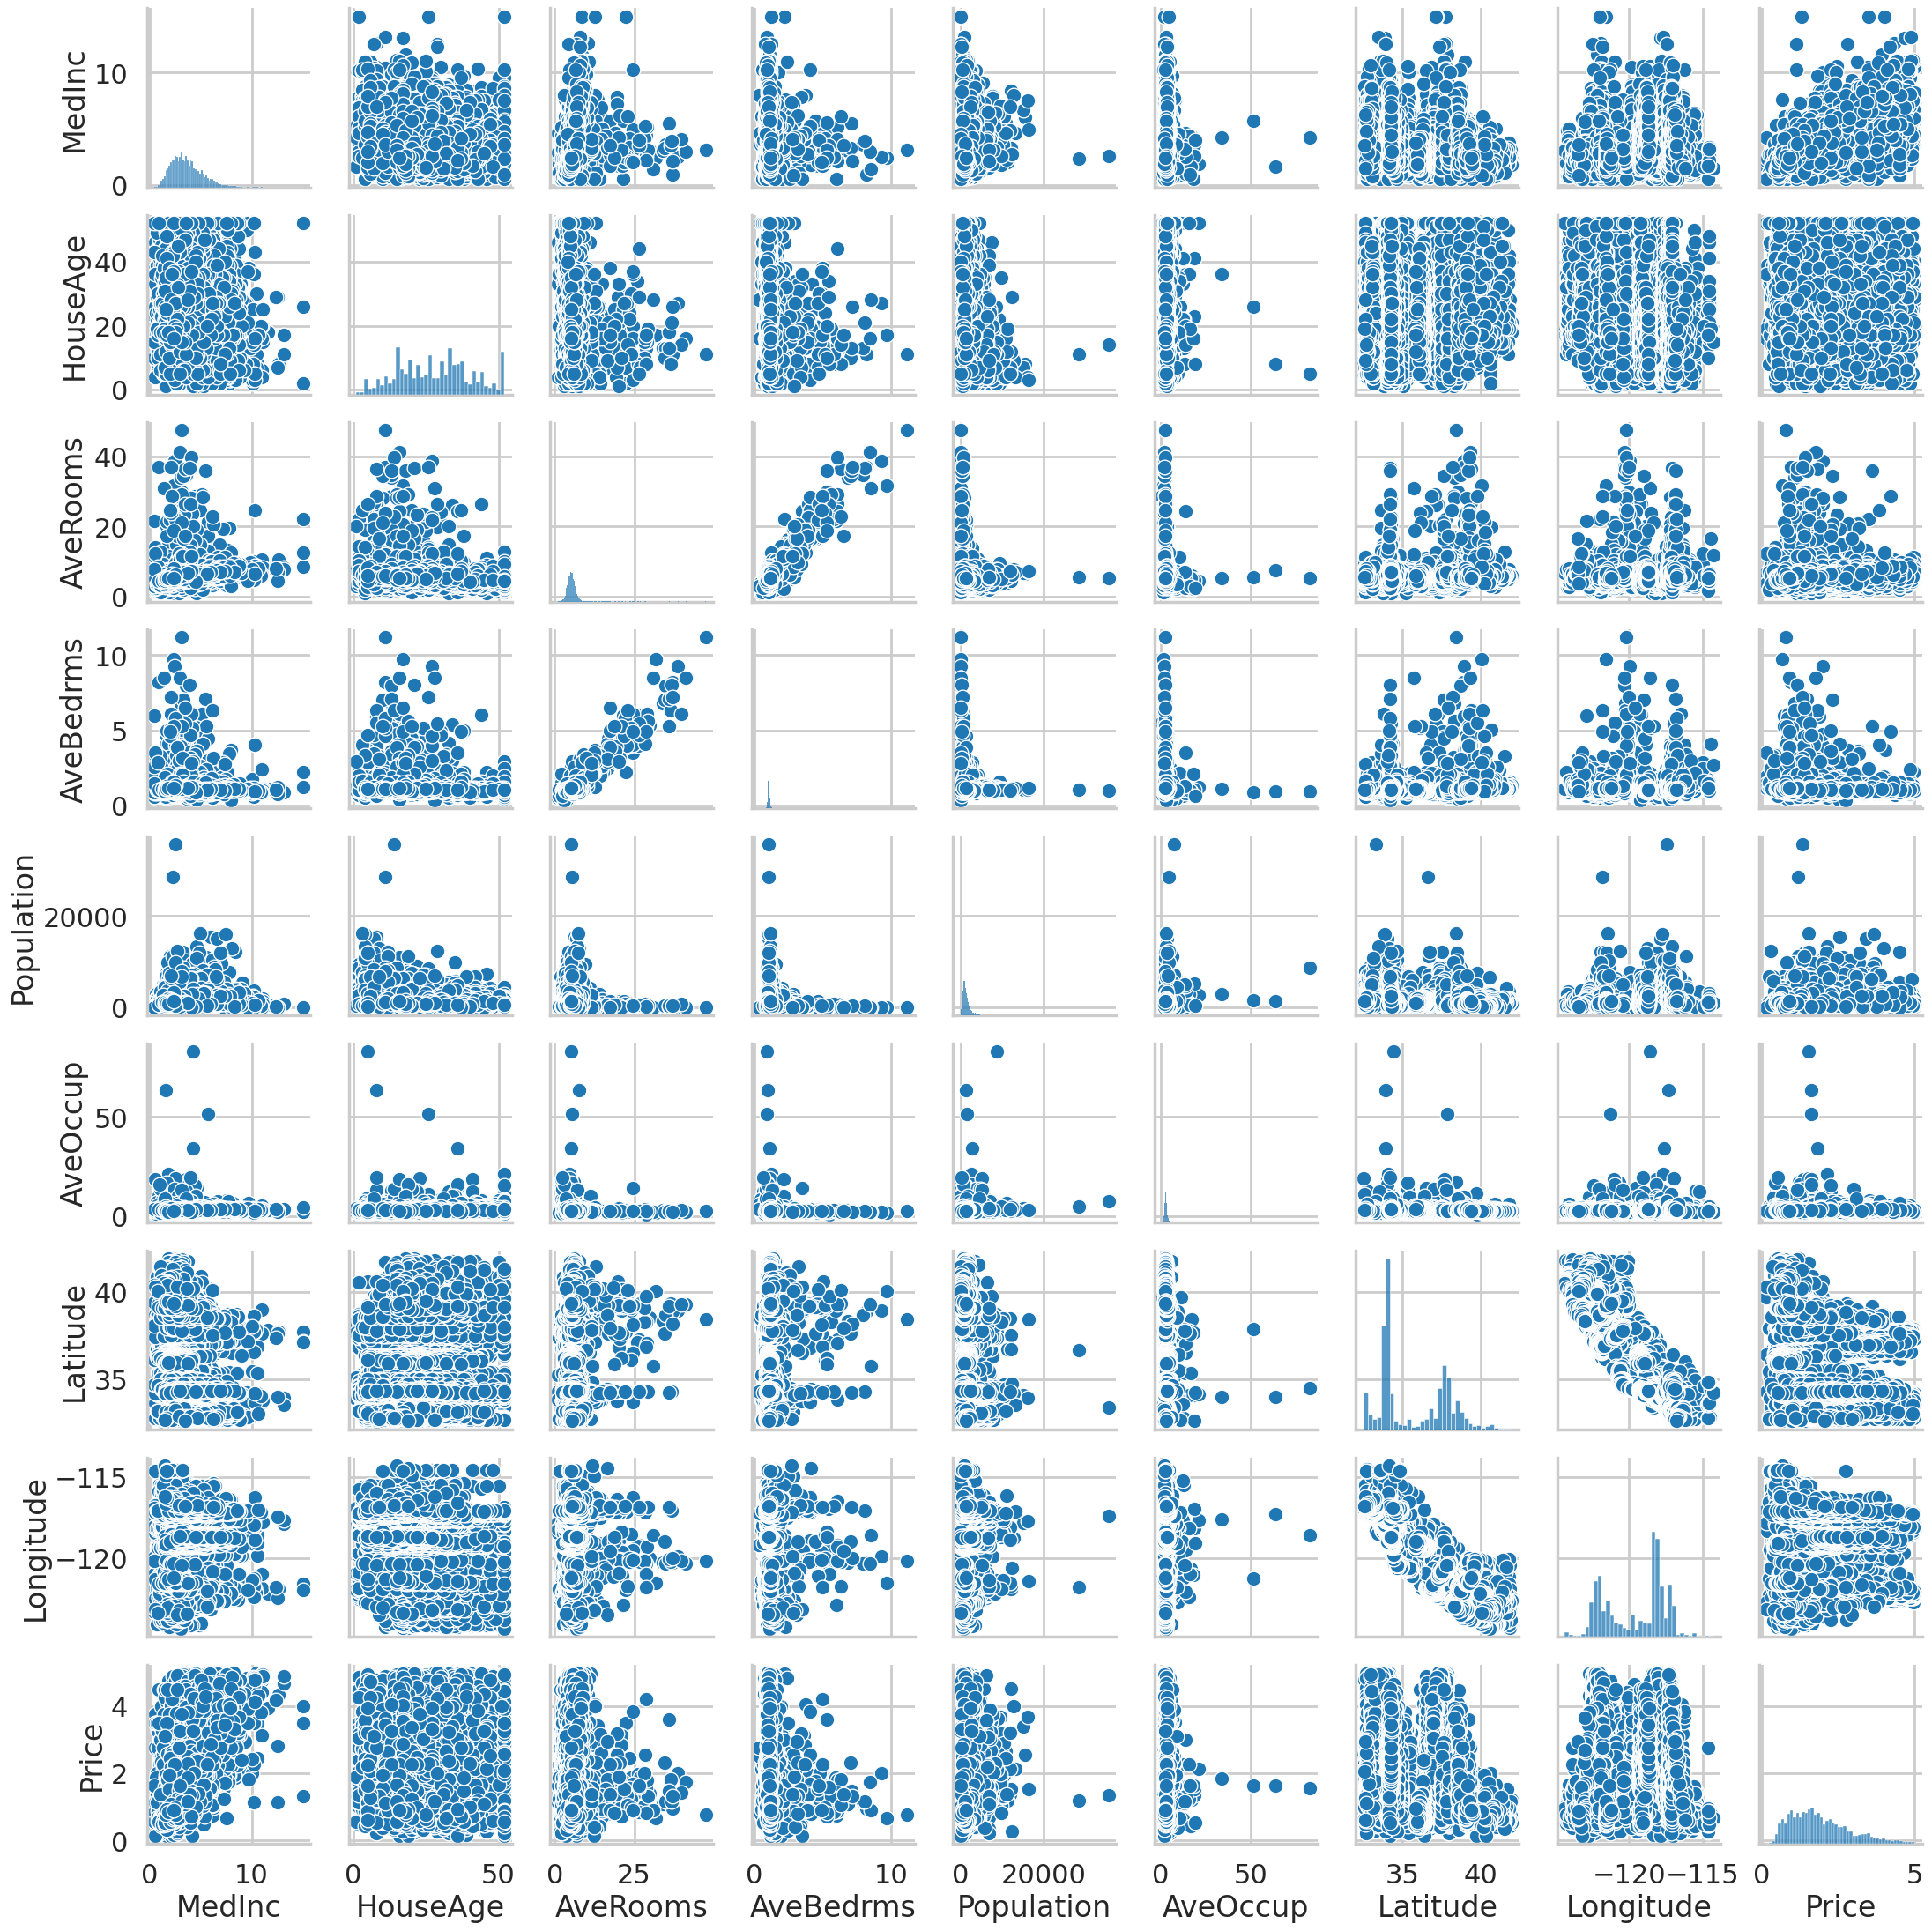

In [17]:
# We observe from above that the data contains outliers and capped values
# outliers - Especially for AveRooms, AveOccup
# Capped values - Values above a certain limit have been cut off and replaced with the maximum allowed value.
# Hrere capped values are observed in price Remove rows where Price == 5.0 (if you want accurate regression).

#  Handle outliers
# For example: remove extreme outliers in AveRooms, AveOccup
housing_df = housing_df[housing_df['AveRooms'] < 50]
housing_df = housing_df[housing_df['AveOccup'] < 100]

# Remove capped price values (optional)
housing_df = housing_df[housing_df['Price'] < 5.0]

sns.pairplot(data=housing_df)
plt.show()

<Axes: xlabel='MedInc', ylabel='Price'>

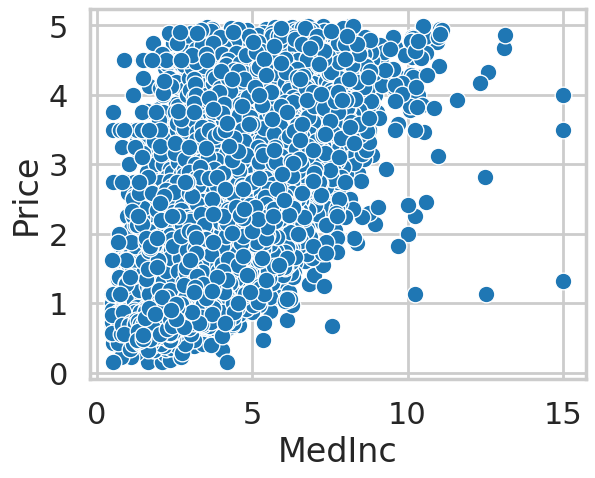

In [18]:
sns.scatterplot(x='MedInc', y='Price', data=housing_df)

We can see in the above scatter plot that the straight line is gone since we handled the capped values

In [19]:
# It can be observed that MedInc, Latitude, Longitude show some good relationship with price
# So we will explore them
housing_df1 = housing_df[['MedInc', 'Latitude', 'Longitude', 'Price']]
housing_df1.head()

MedInc  Latitude  Longitude  Price
0  8.3252     37.88    -122.23  4.526
1  8.3014     37.86    -122.22  3.585
2  7.2574     37.85    -122.24  3.521
3  5.6431     37.85    -122.25  3.413
4  3.8462     37.85    -122.25  3.422

In [20]:
# Finding out the corelation between features
corr1 = housing_df1.corr()
corr1.shape

(4, 4)

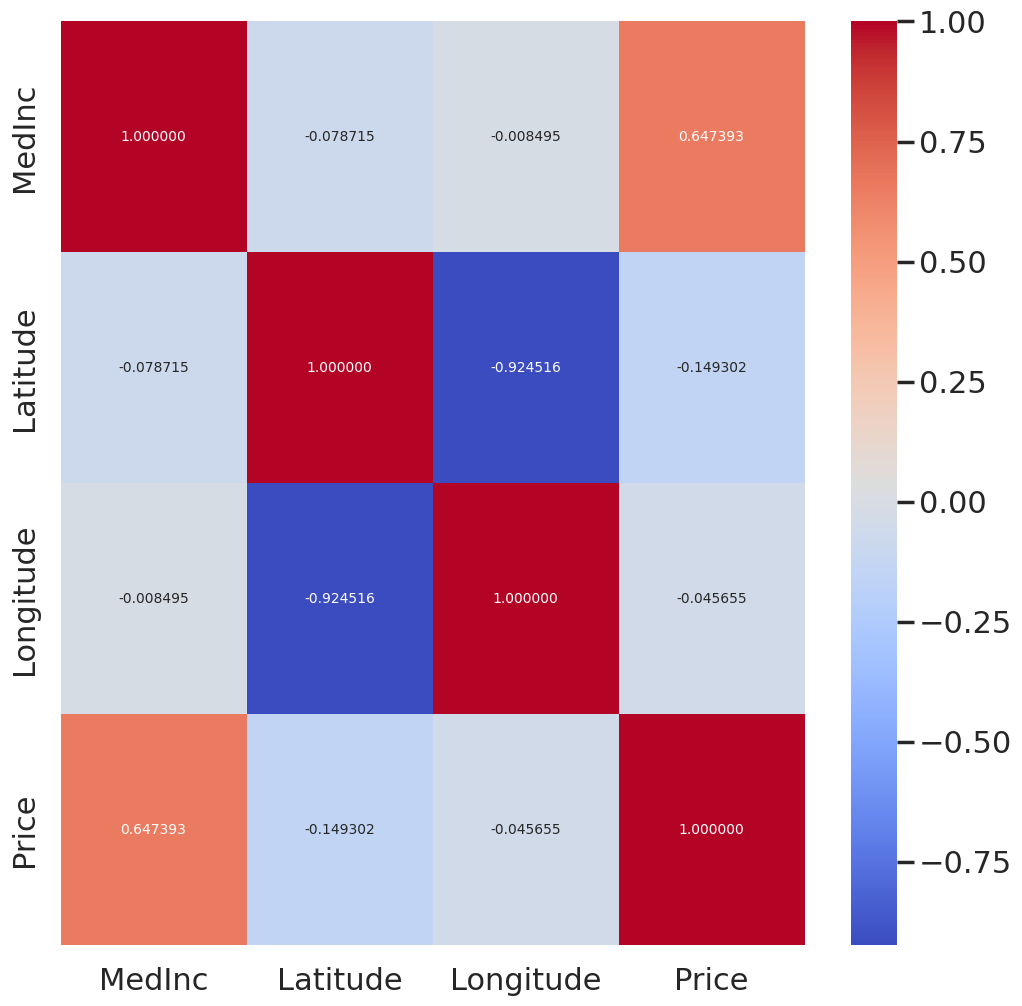

In [21]:
# Plotting the heatmap for coreltion between features
plt.figure(figsize=(12,12))
sns.heatmap(corr1, cbar = True, fmt='1f', annot= True, annot_kws = {'size':10}, cmap = 'coolwarm');

Strongest Feature

    MedInc is by far the most influential feature here — it explains ~65% of the variation in Price (in linear terms).

In [22]:
housing_df1.corr()

MedInc  Latitude  Longitude     Price
MedInc     1.000000 -0.078715  -0.008495  0.647393
Latitude  -0.078715  1.000000  -0.924516 -0.149302
Longitude -0.008495 -0.924516   1.000000 -0.045655
Price      0.647393 -0.149302  -0.045655  1.000000

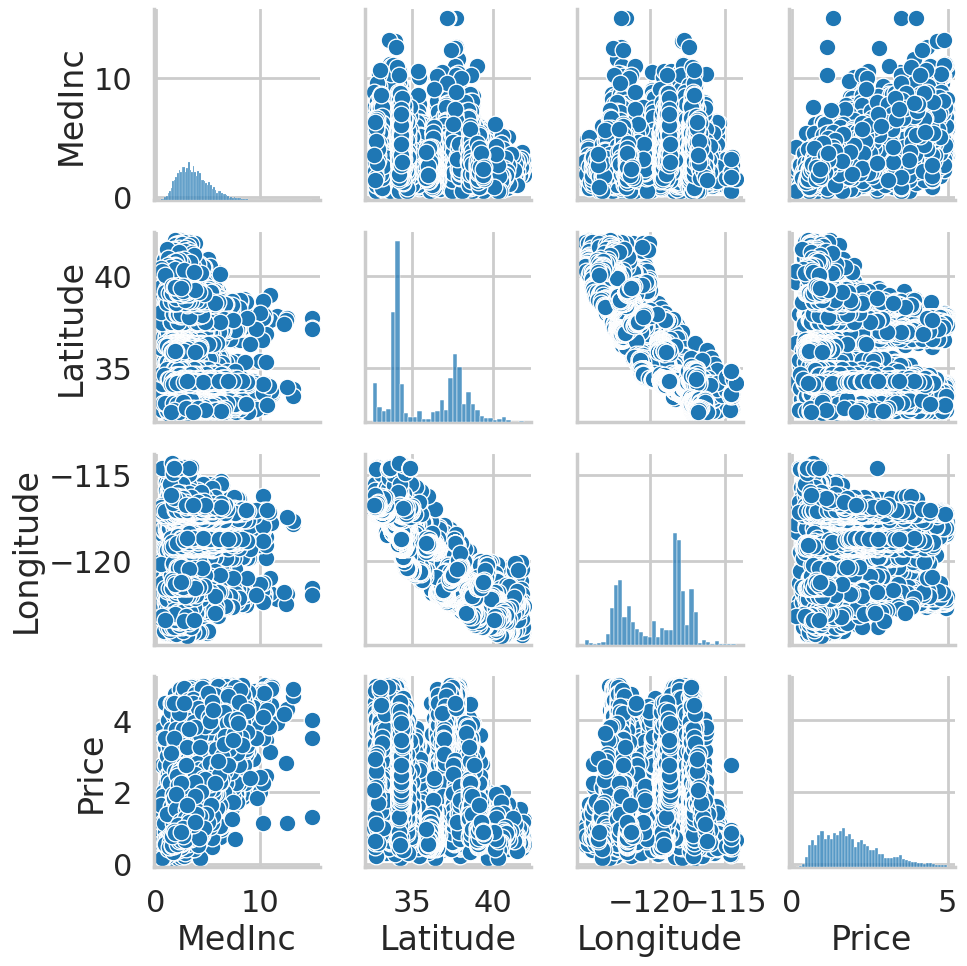

In [23]:
sns.pairplot(data=housing_df1)

In [24]:
# Description about data
desc = housing_df1.describe().round(2)
desc

MedInc  Latitude  Longitude     Price
count  19636.00  19636.00   19636.00  19636.00
mean       3.68     35.65    -119.56      1.92
std        1.57      2.15       2.01      0.97
min        0.50     32.54    -124.35      0.15
25%        2.53     33.93    -121.76      1.16
50%        3.45     34.27    -118.50      1.74
75%        4.58     37.73    -117.99      2.48
max       15.00     41.95    -114.31      4.99

# Understanding the Feature Corelation

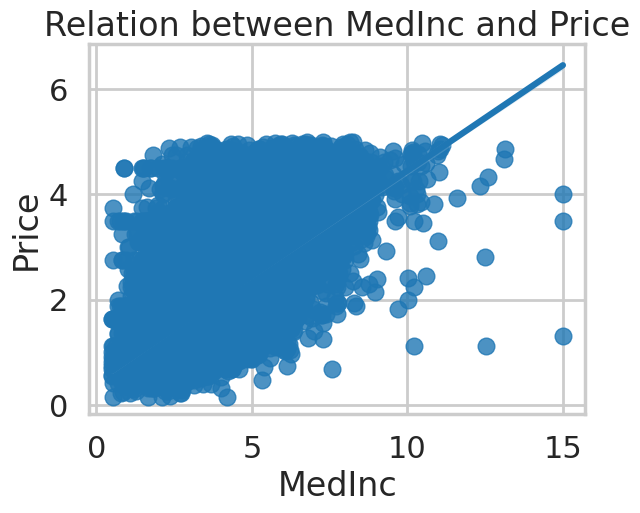

In [25]:
# Relation betwwen MedInc and Price
sns.regplot(x = "MedInc", y = "Price", data = housing_df, fit_reg = True)
plt.title("Relation between MedInc and Price")
plt.show()

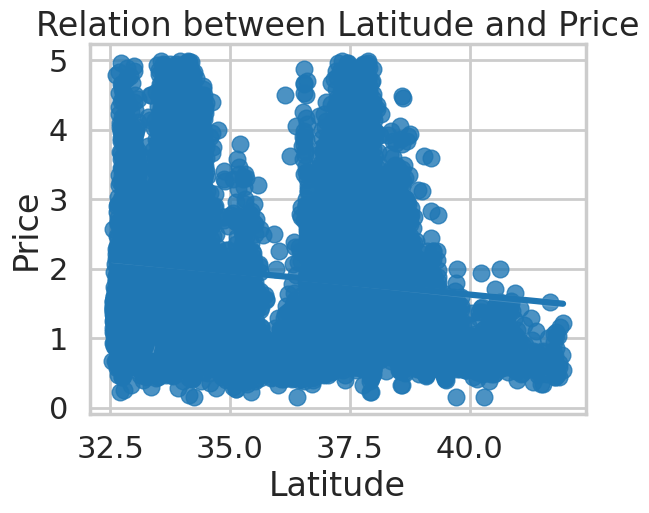

In [26]:
# Relationship between Latitude and Price
sns.regplot(x = "Latitude", y = "Price", data = housing_df, fit_reg = True)
plt.title("Relation between Latitude and Price")
plt.show()

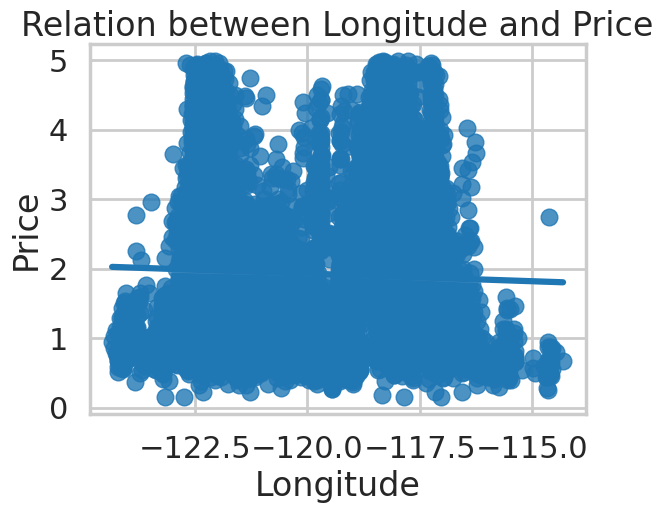

In [27]:
# Relationship between Longitude and Price
sns.regplot(x = "Longitude", y = "Price", data = housing_df, fit_reg = True)
plt.title("Relation between Longitude and Price")
plt.show()

# Univariate and Multivariate Data Analysis

/tmp/ipython-input-28-4277418215.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a = housing_df1.Price, color = '#050020')


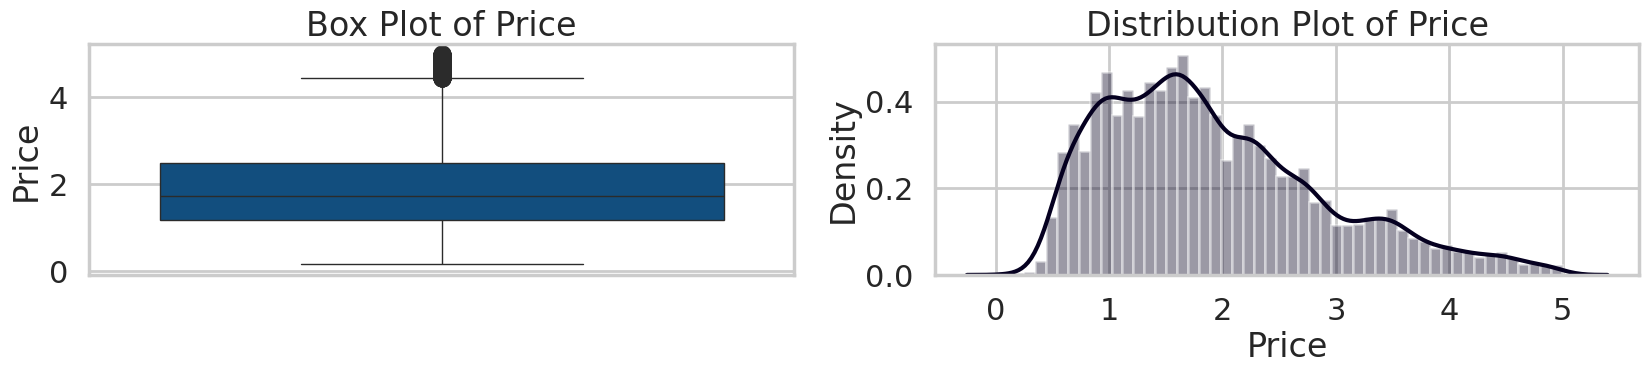

In [28]:
# Analysing the Price
plt.figure(figsize=(20,3))

plt.subplot(1,2,1)
sns.boxplot(housing_df1.Price, color = '#005090')
plt.title('Box Plot of Price')

plt.subplot(1,2,2)
sns.distplot(a = housing_df1.Price, color = '#050020')
plt.title('Distribution Plot of Price')
plt.show()

What conclusions should you draw?
🎯 From all these plots and steps:

➤ 1. MedInc is a strong predictor

    You see a clear positive slope with Price

    Try log(MedInc) for better results later

➤ 2. Latitude/Longitude might not work linearly

    But when combined (like in maps, clustering, or Decision Trees) → very useful

    Linear regression alone may struggle with them

➤ 3. Price is skewed

    Consider log-transforming Price if you want a more balanced target

➤ 4. Still some outliers (but that’s okay!)

    Real-world data is messy

    Don’t overclean — models like RandomForest or XGBoost can handle mild outliers

In [29]:
# We see outliers at the extreme ends
# To elimunate these outliers we take IQR

Price_Q3 = desc['Price']['75%']
Price_Q1 = desc['Price']['25%']
Price_IQR = Price_Q3 - Price_Q1
Price_UV = Price_Q3 + 1.5*Price_IQR
Price_LV = Price_Q1 - 1.5*Price_IQR

housing_df1[housing_df1['Price'] < Price_LV] # No low end value outliers

Empty DataFrame
Columns: [MedInc, Latitude, Longitude, Price]
Index: []

In [30]:
housing_df1[housing_df1['Price'] > Price_LV]

MedInc  Latitude  Longitude  Price
0      8.3252     37.88    -122.23  4.526
1      8.3014     37.86    -122.22  3.585
2      7.2574     37.85    -122.24  3.521
3      5.6431     37.85    -122.25  3.413
4      3.8462     37.85    -122.25  3.422
...       ...       ...        ...    ...
20635  1.5603     39.48    -121.09  0.781
20636  2.5568     39.49    -121.21  0.771
20637  1.7000     39.43    -121.22  0.923
20638  1.8672     39.43    -121.32  0.847
20639  2.3886     39.37    -121.24  0.894

[19636 rows x 4 columns]

In [31]:
print(f'Shape of dataset before removing the outliers: {housing_df1.shape}')

# Remove capped prices
housing_df2 = housing_df1[housing_df1['Price'] < 5.0]

print(f'Shape of dataset after removing the outliers: {housing_df2.shape}')


Shape of dataset before removing the outliers: (19636, 4)
Shape of dataset after removing the outliers: (19636, 4)


TO remove SKEWED values

In [32]:
housing_df['LogPrice'] = np.log1p(housing_df['Price'])  # new target


# Testing and Training

In [33]:
from sklearn.model_selection import train_test_split

X = housing_df.drop(['Price', 'LogPrice'], axis=1)  # or just 'Price' if not log-transforming
y = housing_df['LogPrice']  # or use 'Price' if not log-transforming

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)  # renamed from y_pred to y_pred_lr

print("Linear Regression R²:", r2_score(y_test, y_pred_lr))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))


Linear Regression R²: 0.614956131992737
Linear Regression RMSE: 0.20174413260366947


In [35]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest R² Score:", r2_score(y_test, y_pred_rf))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))


Random Forest R² Score: 0.809101763833781
Random Forest RMSE: 0.14205180775979223


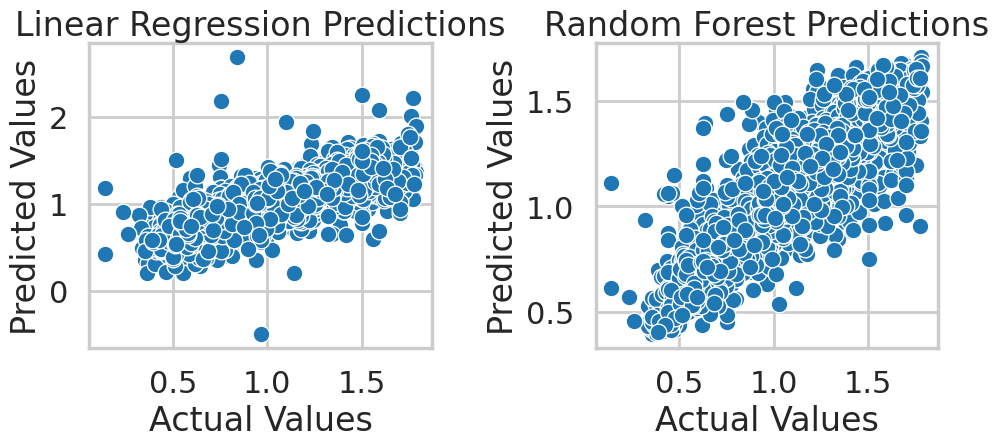

In [36]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_lr)
plt.title("Linear Regression Predictions")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.title("Random Forest Predictions")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

plt.tight_layout()
plt.show()


In [37]:
import numpy as np

df['MedInc_log'] = np.log1p(df['MedInc'])
df['AveRooms_log'] = np.log1p(df['AveRooms'])
df['AveOccup_log'] = np.log1p(df['AveOccup'])
df['Population_log'] = np.log1p(df['Population'])

# Drop original skewed features
df.drop(['MedInc', 'AveRooms', 'AveOccup', 'Population'], axis=1, inplace=True)


In [38]:
!pip install xgboost

In [39]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Split data
X = df.drop('MedInc_log', axis=1)
y = df['MedInc_log']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb.predict(X_test)

# Evaluate
print("XGBoost R² Score:", r2_score(y_test, y_pred_xgb))
print("XGBoost RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))


XGBoost R² Score: 0.8022791988838394
XGBoost RMSE: 0.15804366997167021


In [40]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200], #How many trees to build
    'max_depth': [3, 5, 7], 	#How deep each tree can go
    'learning_rate': [0.05, 0.1], #How much to shrink weights on each step
    'subsample': [0.8, 1.0] #How much data to use for each tree (boosting)
}

xgb = XGBRegressor(random_state=42)

grid = GridSearchCV(estimator=xgb,
                    param_grid=param_grid,
                    scoring='r2',
                    cv=3,
                    verbose=1,
                    n_jobs=-1)

grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best Score (Train CV):", grid.best_score_)

# Evaluate best model on test set
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)

print("Tuned XGBoost R² Score:", r2_score(y_test, y_pred_best))
print("Tuned XGBoost RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_best)))


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Params: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Best Score (Train CV): 0.8174369989076388
Tuned XGBoost R² Score: 0.8147566896284884
Tuned XGBoost RMSE: 0.15297560940752383


/tmp/ipython-input-41-4250668058.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


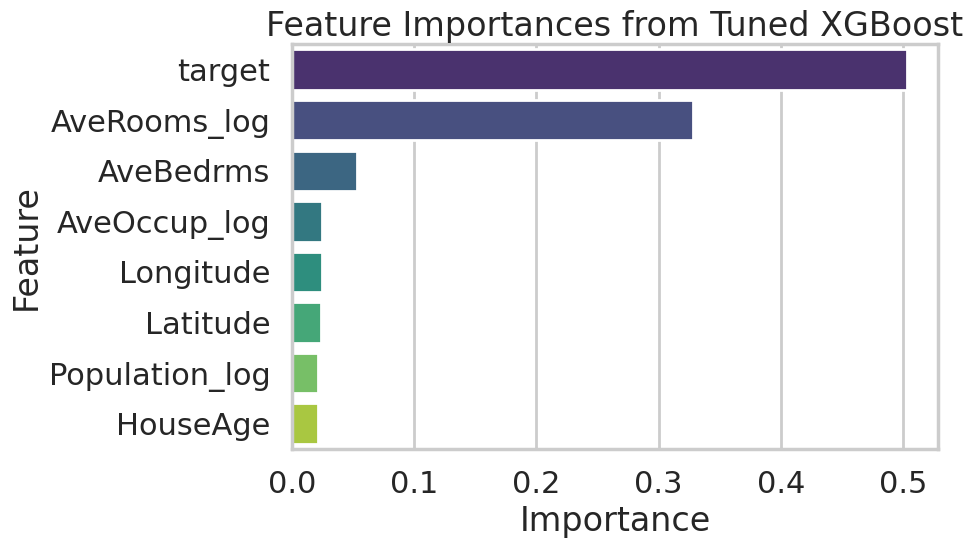

In [41]:
# Get feature importances from best model
importances = best_model.feature_importances_
features = X_train.columns

# Create DataFrame for plotting
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importances from Tuned XGBoost')
plt.tight_layout()
plt.show()


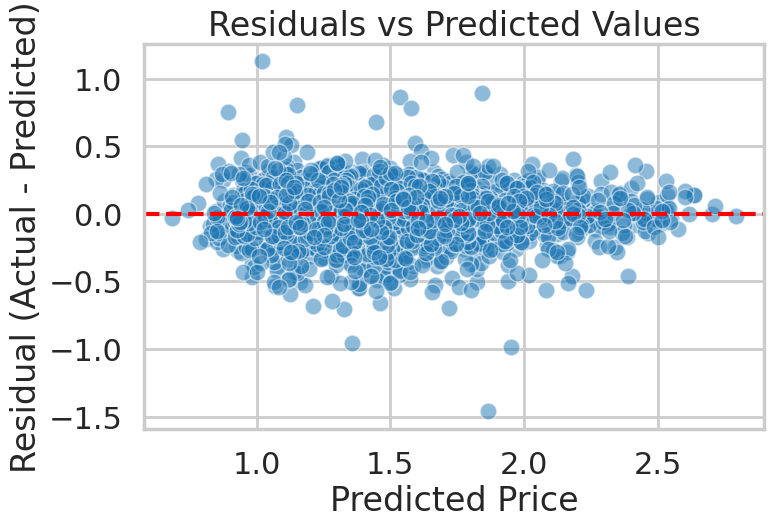

In [42]:
# Calculate residuals
residuals = y_test - y_pred_best

# Scatter plot of predicted vs residuals
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred_best, y=residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Price')
plt.ylabel('Residual (Actual - Predicted)')
plt.show()


Interpretation of Your Plot:
✅ 1. Centering Around 0 (Red Line)

    The bulk of the residuals are centered around 0

    Means your model is not biased — it’s not consistently over- or underpredicting

✔️ Good sign ✅
✅ 2. Symmetrical Bell Curve Shape

    Residuals are roughly normally distributed

    This suggests your model is well-calibrated, and errors are random — which is what you want

✔️ Another good sign ✅
✅ 3. Tight Spread

    Most residuals lie within ±0.5

    A few outliers in the tails (e.g., ±1 to ±1.5) — but that’s completely normal in real-world data

✔️ Shows your model generalizes well ✅
🔬 If This Looked "Bad", You'd See:
Bad Pattern	Meaning
Skewed left/right	Consistent under/overprediction
Flat curve or long tails	High variance — model not generalizing
Spikes far from zero	Too many large errors / outliers
✅ Final Verdict on Your Plot:

    🎯 Your model's errors are mostly small, randomly spread, and centered on zero — which means it's well-fitted and unbiased.

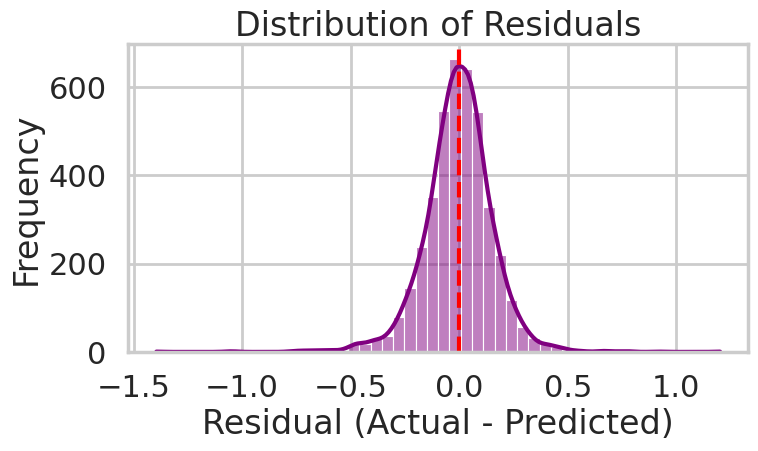

In [43]:
residuals = y_test - y_pred_xgb

plt.figure(figsize=(8, 4))
sns.histplot(residuals, bins=50, kde=True, color='purple')
plt.title("Distribution of Residuals")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frequency")
plt.axvline(0, color='red', linestyle='--')
plt.show()